In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [8]:
file_path = '/content/IMDB Poject/Cleaned_DataSet.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
else:
    print(f"Error: File not found at {file_path}. Please check your folder name and upload the file.")

Dataset loaded successfully!


In [9]:
df = df.dropna(subset=['imdb_score', 'director_name', 'genres', 'movie_title'])
sns.set(style="whitegrid")

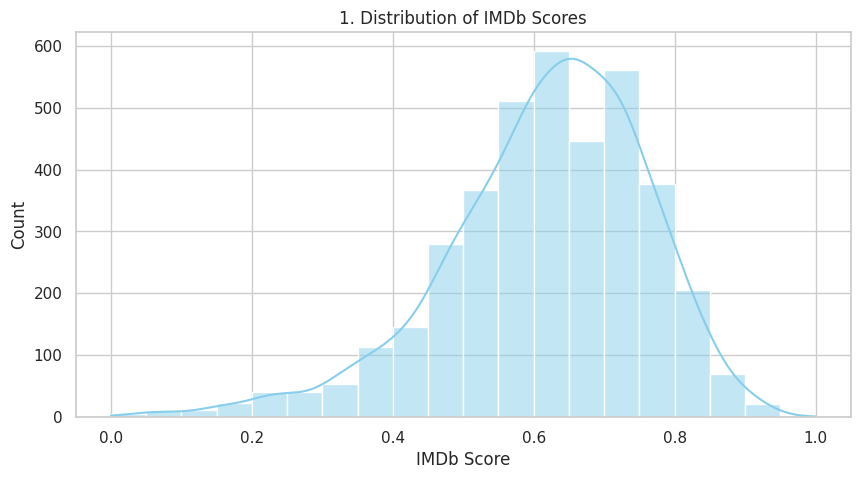

In [21]:
# 1. Distribution of IMDb Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')
plt.title('1. Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.show()

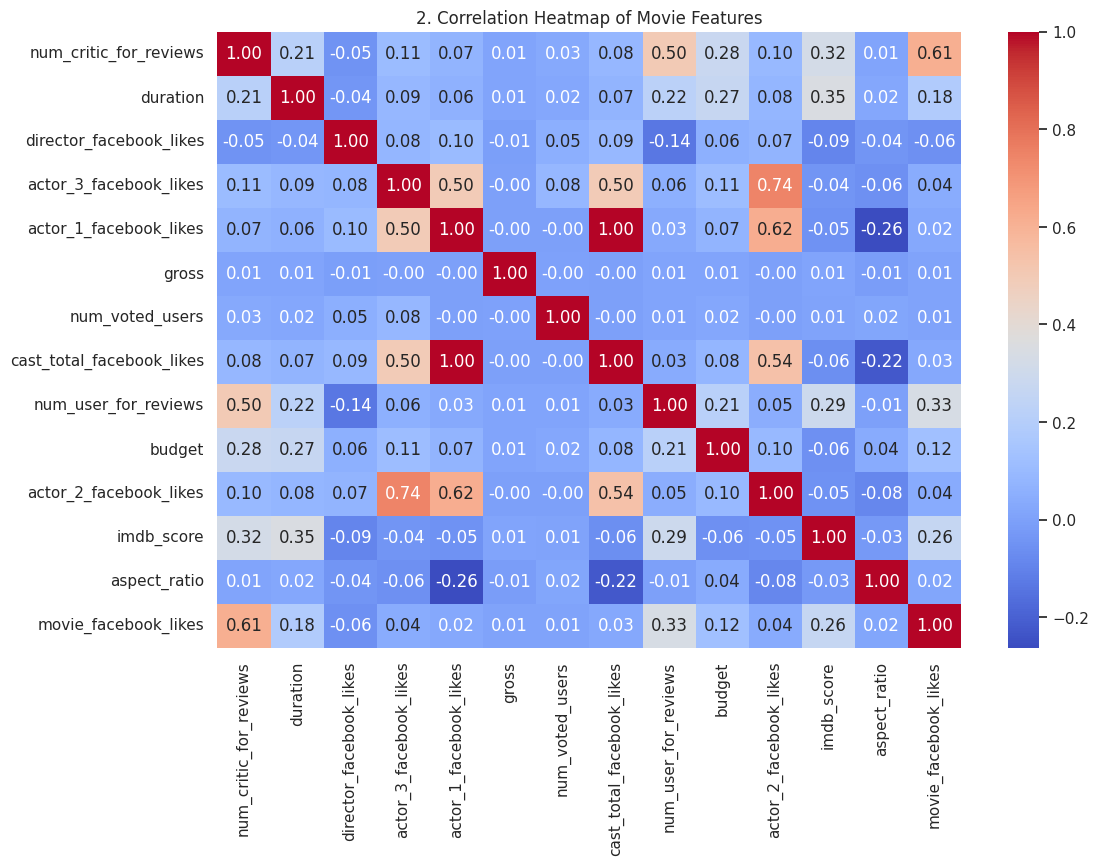

In [22]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Drop non-numeric and empty columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['title_year'], errors='ignore')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('2. Correlation Heatmap of Movie Features')
plt.show()

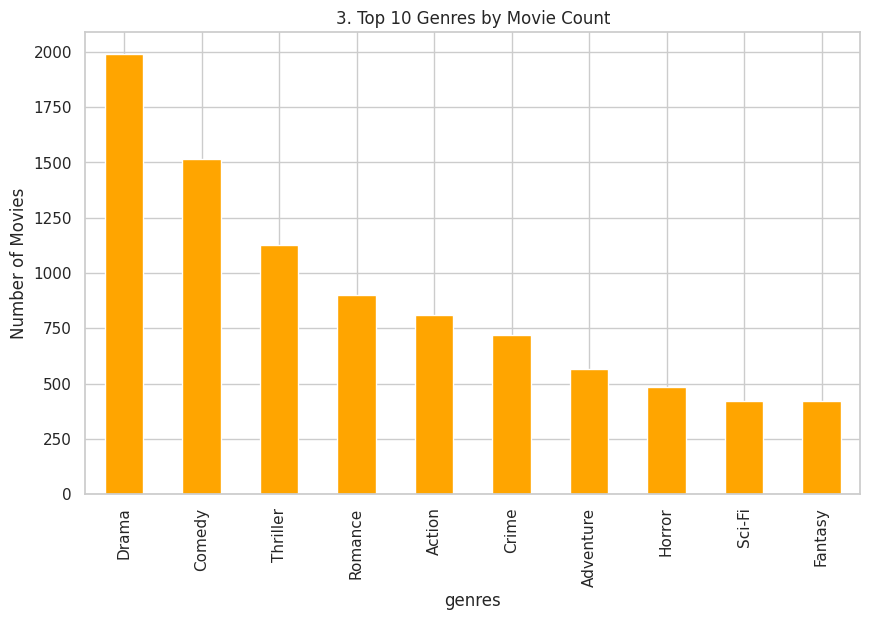

In [23]:
# 3. Top 10 Genres by Movie Count
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')
plt.figure(figsize=(10, 6))
df_genres['genres'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('3. Top 10 Genres by Movie Count')
plt.ylabel('Number of Movies')
plt.show()

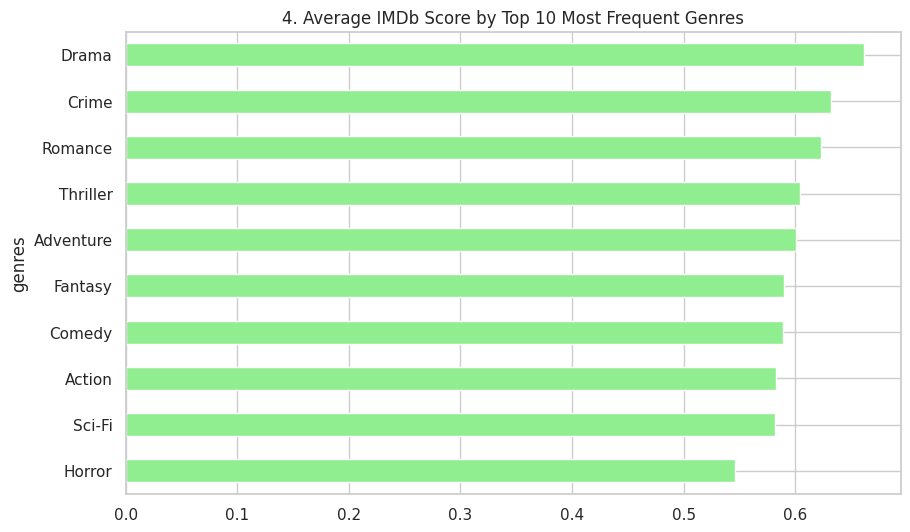

In [24]:
# 4. Average IMDb Score by Top 10 Genres
top_10_genres_list = df_genres['genres'].value_counts().head(10).index
avg_score_genre = df_genres[df_genres['genres'].isin(top_10_genres_list)].groupby('genres')['imdb_score'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_score_genre.plot(kind='barh', color='lightgreen')
plt.title('4. Average IMDb Score by Top 10 Most Frequent Genres')
plt.show()

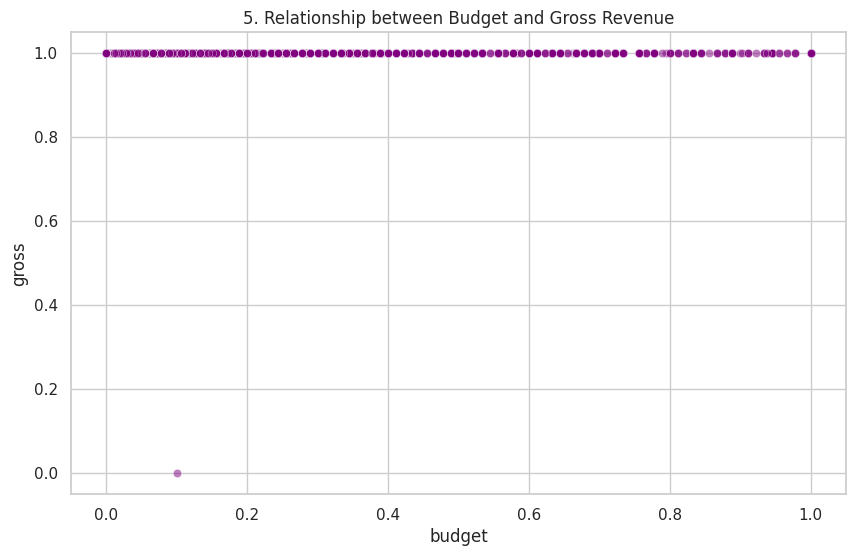

In [25]:
# 5. Budget vs. Gross Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross', alpha=0.5, color='purple')
plt.title('5. Relationship between Budget and Gross Revenue')
plt.show()

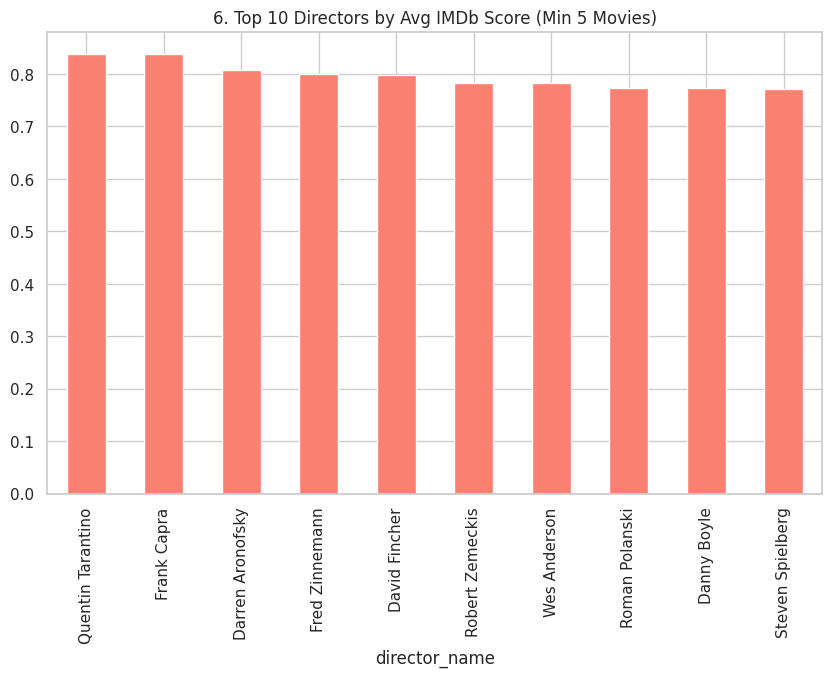

In [26]:
# 6. Top 10 Directors (Min 5 movies)
dir_counts = df['director_name'].value_counts()
top_dirs = dir_counts[dir_counts >= 5].index
avg_dir_score = df[df['director_name'].isin(top_dirs)].groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_dir_score.plot(kind='bar', color='salmon')
plt.title('6. Top 10 Directors by Avg IMDb Score (Min 5 Movies)')
plt.show()

/tmp/ipython-input-3823105146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='content_rating', y='imdb_score', palette='Set3')


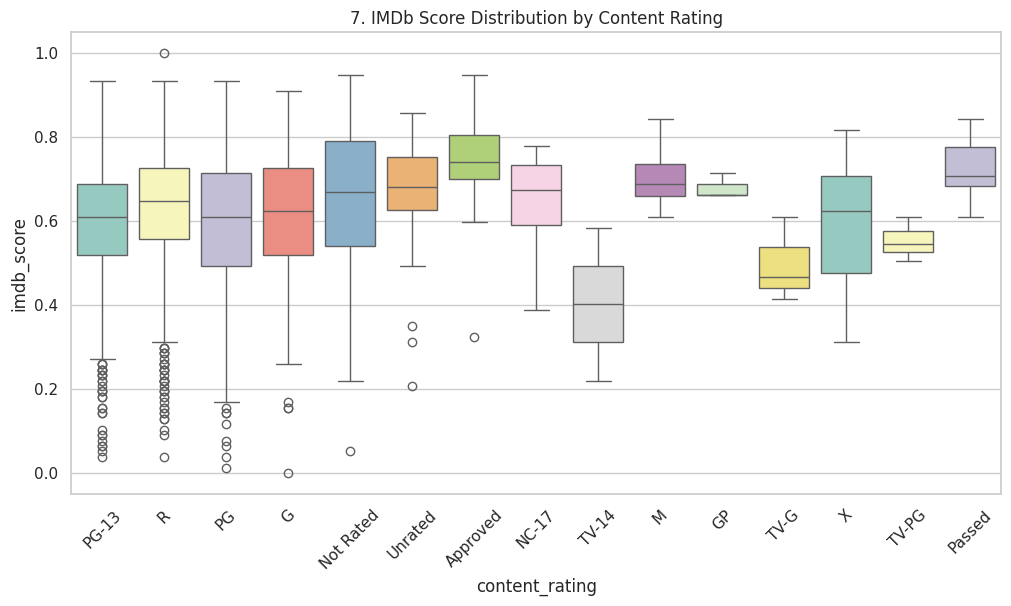

In [27]:
# 7. IMDb Score by Content Rating (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='content_rating', y='imdb_score', palette='Set3')
plt.title('7. IMDb Score Distribution by Content Rating')
plt.xticks(rotation=45)
plt.show()

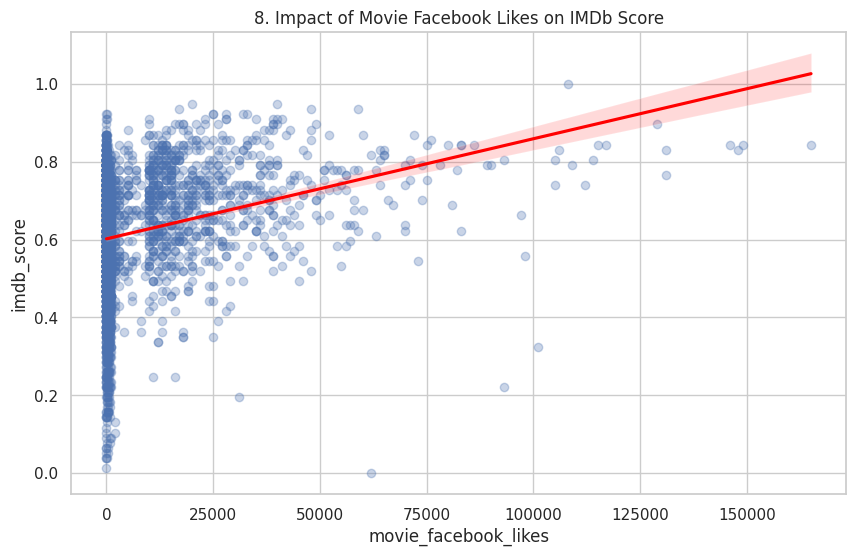

In [28]:
# 8. Movie Facebook Likes vs. IMDb Score
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='movie_facebook_likes', y='imdb_score', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('8. Impact of Movie Facebook Likes on IMDb Score')
plt.show()

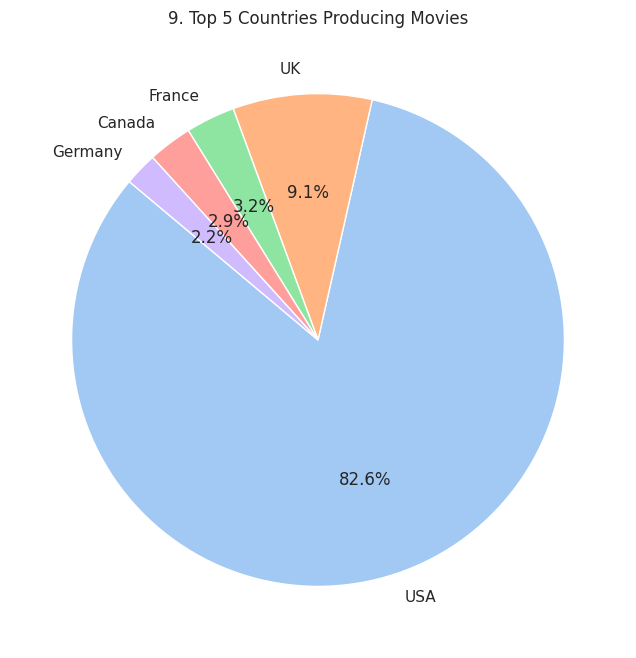

In [29]:
# 9. Top 5 Countries by Movie Production
plt.figure(figsize=(8, 8))
df['country'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('9. Top 5 Countries Producing Movies')
plt.ylabel('')
plt.show()

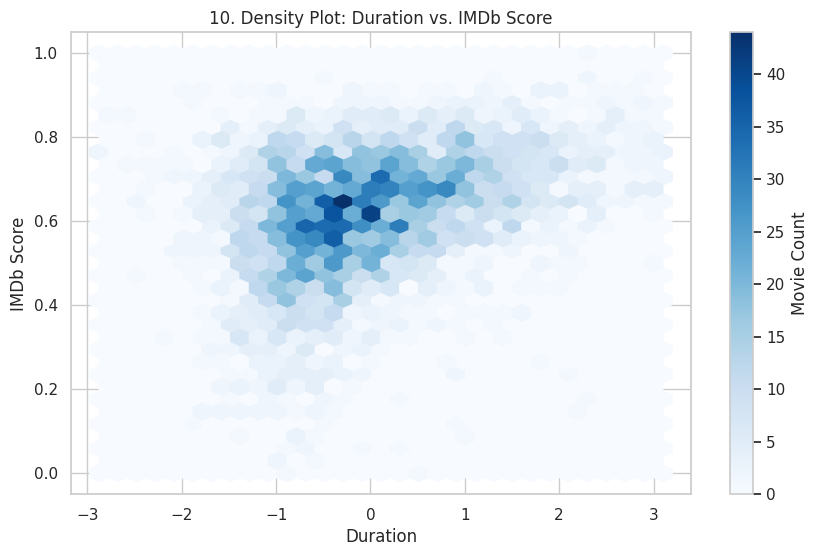

In [19]:
# 10. Duration vs. IMDb Score (Hexbin)
plt.figure(figsize=(10, 6))
plt.hexbin(df['duration'], df['imdb_score'], gridsize=30, cmap='Blues')
plt.title('10. Density Plot: Duration vs. IMDb Score')
plt.xlabel('Duration')
plt.ylabel('IMDb Score')
plt.colorbar(label='Movie Count')
plt.show()